# **Final Project Task 1 - Census Data Preprocess**


Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data
- Handle missing values if any
- Correct errors, inconsistencies, remove duplicates if any
- Outlier detection and treatment if any
- Normalization / Standardization if necesarry
- Feature engineering
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [27]:
# incepem prin a verifica primele 5 randuri din setul de date 
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [28]:
#mai apoi, verificam dimensiunea setului de date, pe coloane si pe randuri
print(f"Setul de date conține {data.shape[0]} rânduri și {data.shape[1]} coloane.")

Setul de date conține 32561 rânduri și 15 coloane.


In [29]:
# pentru a vedea daca avem NA in data set - per coloane 
data.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [30]:
data.drop_duplicates()

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32537 rows x 15 columns]

### dupa aceste formule, in special drop duplicates, am eliminat randurile cu valori duplicate din setul de date, 24 mai exact
### astfel, dupa eliminarea lor, calitatea datelor s-a imbunatatit putin. Initial erau 32651 randuri, iar dupa stergerea duplicatelor au ramas 32537 randuri

## Acum, pentru a verifica setul de date, vom aplica o formula pentru *outliers* + un BOXPLOT pentru a observa distributia valorilor, in special pentru variabila noastra de interes si anume "hours per week"

In [31]:
def process_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

col_numerice = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

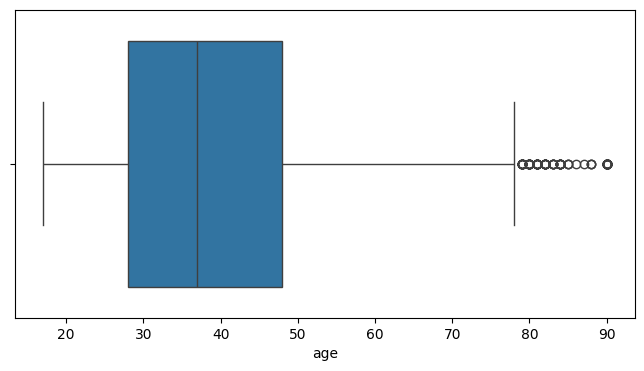

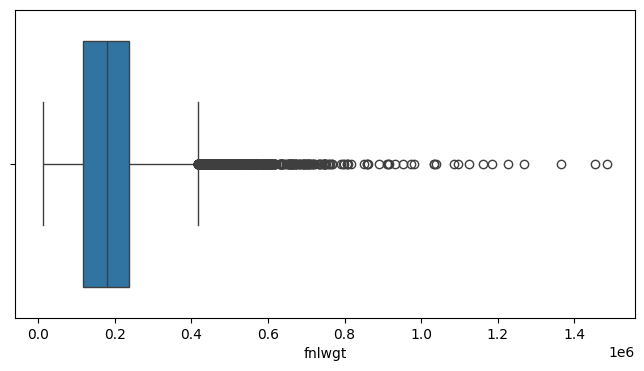

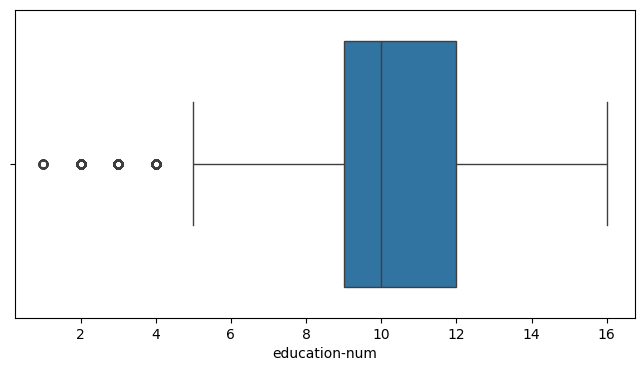

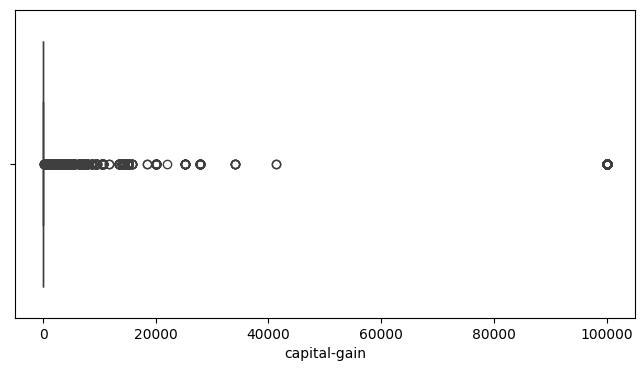

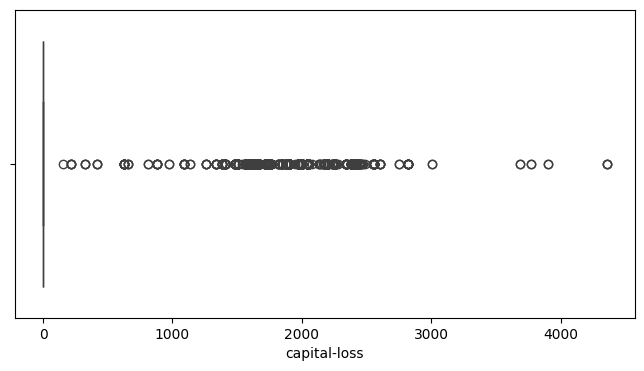

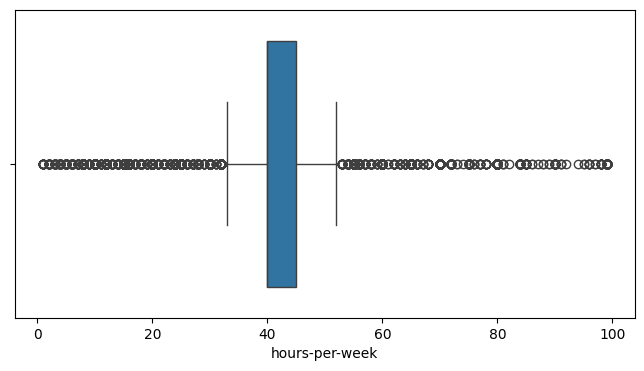

In [32]:
for col in col_numerice:
    plt.figure(figsize=(8, 4))
    sns.boxplot (x=data[col])
    plt.show()
    data=process_outliers(data, col)

## Prin aceste boxploturi putem observa ca la nivelul setului de date exista valori extreme, care poate impacta modelul de regresie. 

### *Box-plot ul cu variabila care ne intereseaza si anume "hours per week"* are o mediana (linia din interiorul dreptunghiului albastru) cu o valoare de 40, ceea ce inseamna ca jumatate din cazuri din setul nostru de date lucreaza sub 40 de ore, iar cealalta jumatate lucreaza peste 40 de ore. Quartilele sunt si ele importante, deoarece avem o intindere a boxplotului pana la 35 de ore, ceea ce inseamna ca 50% dintre persoane lucreaza intre 35 si 40 de ore pe saptamana. Avem o variabilitate mica spre moderata a orelor lucrate, putine fiind cazurile care lucreaza mai mult decat majoritatea persoanelor. 

### De aceea s-a aplicat formula *IQR* pentru eliminarea de outliers extremi, cu scopul de a avea un set de date mai bun. Per total, formula calculeaza limitele extreme inferioare si superioare, avand la baza standardul 1,5*IQR. 

# ENCODING DATA + FEATURE ENGINEERING

#### Incepem prin a crea o coloana noua, realizata prin unirea a doua coloane similare (capital-gain si capital-loss)
#### Pe urma le vom elimina, pastrand strict coloana principala, cea combinata, unde 1 reprezinta cazurile cu venit peste 50K, iar 0 reprezinta cazurile cu venit sub 50K

In [33]:
data['capital_net'] = data['capital-gain'] - data['capital-loss']

data.drop(columns=['capital-gain', 'capital-loss'], inplace=True)

In [34]:
categorical_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data.shape)
print(data.head())

(32561, 100)
   age  fnlwgt  education-num  hours-per-week  capital_net  \
0   39   77516             13              40         2174   
1   50   83311             13              13            0   
2   38  215646              9              40            0   
3   53  234721              7              40            0   
4   28  338409             13              40            0   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  workclass_Self-emp-inc  ...  native-country_Puerto-Rico  \
0              False                   False  ...                       False   
1            

In [35]:
def categorii_varsta(age):
    if age < 18:
      return "tânăr"
    elif (age > 18) and (age < 50):
      return "adult"
    else:
      return "senior"


### Pentru aceasta etapa, am ales *OneHotEncoding* deoarece este o tehnica prin care se pot transforma coloanele categorice in coloane binare - 0 sau 1 - 
#### Spre deosebire de alte metode, acesta va permite o interpretare mai buna a modelului, fara a crea o ierarhie in date.
#### In plus, se evita si multi-coliniaritatea, prin drop_first=True, cu scopul de a evita impactul negativ pe care il poate aduce asupra performantei modelului
#### In final, am facut o functie care sa imi imparta variabila "AGE" pe 3 categorii diferite:
#### - sub 18 ani - tanar
#### - intre 18 si 49 de ani - adult 
#### - peste 50 de ani - senior 

In [36]:
print(data.columns)

Index(['age', 'fnlwgt', 'education-num', 'hours-per-week', 'capital_net',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-manager

### Mai departe, voi folosi StandardScaler (care e mai putin sensibil la outliers) si MinMax Scaler care, desi e sensibil la outliers, mentine o distributie destul de buna a datelor
#### incepem cu StandardScaler, fiind cel mai usor de folosit, apoi, pe parcurs, in baza datelor vom decide care dintre cele doua e mai bun

In [43]:
scaler = StandardScaler()
col_numerice = ['age', 'fnlwgt', 'education-num', 'capital_net']
date_standardizate = data.copy()
date_standardizate[col_numerice] = scaler.fit_transform(date_standardizate[col_numerice])

In [62]:
min_max_scaler = MinMaxScaler()
date_normalizate = data.copy()
date_normalizate[col_numerice] = min_max_scaler.fit_transform(date_normalizate[col_numerice])

# TRAIN & TEST 

In [44]:
from sklearn.model_selection import train_test_split

X=data.drop("hours-per-week", axis=1)
y=data["hours-per-week"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train.to_csv("X_train_data.csv", index = False)
X_test.to_csv("X_test_data.csv", index=False)
y_test.to_csv("y_test_data.csv", index=False)
y_train.to_csv("y_train_data.csv", index=False)

In [47]:
print(X_train.shape)
print(X_test.shape)

(26048, 99)
(6513, 99)


### Aceasta functie va imparti setul de date in 2 parti, cea de train si cea de test. Testul va fi 20%, iar trainul va fi 80% (de aici 0.2 din formula anterioara). 42 reprezinta o impartire a datelor reproductibila, adica rularea de mai multe ori a datelor nu va influenta impartirea datelor, aceasta ramanand neschimbata. 
### Ambele seturi de date, atat cel de test cat si cel de train au 99 de coloane, deoarece s-au pastrat toate caracteristicile in urma procesului de standardizare. Modelul StandardScaler se va asigura ca datele au o medie de 0 si o ab standard de 1, imbunatatind modelul.

### Pentru a-mi permite sa folosesc datele si in alte proiecte, am salvat sub forma CSV.
### Numele fiecarul fisier este destul de sugestiv pentru ceea ce contine, iar salvarea in acest format e utila pentr a nu pierde formatul datelor sau a progresului.